<a href="https://colab.research.google.com/github/FilizEker/Phyton-ML/blob/main/League_of_Legends_Match_Predictor%C2%B6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install scikit-learn
!pip install torch
!pip install matplotlib


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

# Step 1: Load the dataset
data = pd.read_csv("/content/league-of-legends-data-large.csv")  # Replace with your actual file path

# Step 2: Split into features and target
X = data.drop('win', axis=1)
y = data['win']

# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Optional: Print shapes to verify
print("X_train_tensor shape:", X_train_tensor.shape)
print("y_train_tensor shape:", y_train_tensor.shape)
print("X_test_tensor shape:", X_test_tensor.shape)
print("y_test_tensor shape:", y_test_tensor.shape)

X_train_tensor shape: torch.Size([800, 8])
y_train_tensor shape: torch.Size([800, 1])
X_test_tensor shape: torch.Size([200, 8])
y_test_tensor shape: torch.Size([200, 1])


In [7]:
import torch
import torch.nn as nn
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # One output for binary classification

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

In [10]:
import torch.optim as optim
# Assuming X_train is a torch tensor or NumPy array
input_dim = X_train.shape[1]  # Number of features
# Initialize model
model = LogisticRegressionModel(input_dim)
# Define loss function
criterion = nn.BCELoss()
# Define optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [12]:
# Set number of epochs
num_epochs = 1000

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    optimizer.zero_grad()  # Clear gradients

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [100/1000], Loss: 0.7135
Epoch [200/1000], Loss: 0.7028
Epoch [300/1000], Loss: 0.6961
Epoch [400/1000], Loss: 0.6919
Epoch [500/1000], Loss: 0.6894
Epoch [600/1000], Loss: 0.6878
Epoch [700/1000], Loss: 0.6868
Epoch [800/1000], Loss: 0.6862
Epoch [900/1000], Loss: 0.6859
Epoch [1000/1000], Loss: 0.6856


In [13]:
model.eval()  # Set model to evaluation mode

with torch.no_grad():
    # Predictions on training and test sets
    train_preds = model(X_train_tensor)
    test_preds = model(X_test_tensor)

    # Apply threshold of 0.5
    train_preds_class = (train_preds >= 0.5).float()
    test_preds_class = (test_preds >= 0.5).float()

    # Calculate accuracy
    train_accuracy = (train_preds_class == y_train_tensor).float().mean()
    test_accuracy = (test_preds_class == y_test_tensor).float().mean()

    print(f"Training Accuracy: {train_accuracy.item() * 100:.2f}%")
    print(f"Test Accuracy: {test_accuracy.item() * 100:.2f}%")

Training Accuracy: 55.25%
Test Accuracy: 53.50%


In [16]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Initialize model, loss function, and optimizer
input_dim = X_train_tensor.shape[1]
model = LogisticRegressionModel(input_dim)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    train_preds = model(X_train_tensor)
    test_preds = model(X_test_tensor)

    # Apply threshold
    train_preds_class = (train_preds >= 0.5).float()
    test_preds_class = (test_preds >= 0.5).float()

    # Calculate accuracy
    train_accuracy = (train_preds_class == y_train_tensor).float().mean()
    test_accuracy = (test_preds_class == y_test_tensor).float().mean()

    print(f"\nTraining Accuracy: {train_accuracy.item() * 100:.2f}%")
    print(f"Test Accuracy: {test_accuracy.item() * 100:.2f}%")

Epoch [100/1000], Loss: 0.7158
Epoch [200/1000], Loss: 0.7043
Epoch [300/1000], Loss: 0.6970
Epoch [400/1000], Loss: 0.6924
Epoch [500/1000], Loss: 0.6896
Epoch [600/1000], Loss: 0.6879
Epoch [700/1000], Loss: 0.6869
Epoch [800/1000], Loss: 0.6862
Epoch [900/1000], Loss: 0.6859
Epoch [1000/1000], Loss: 0.6856

Training Accuracy: 53.62%
Test Accuracy: 49.00%


In [19]:
# Initialize model
input_dim = X_train_tensor.shape[1]
model = LogisticRegressionModel(input_dim)

# Define loss function
criterion = nn.BCELoss()

# Define optimizer with L2 regularization (weight decay)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)

In [20]:
num_epochs = 1000

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [100/1000], Loss: 0.7272
Epoch [200/1000], Loss: 0.7115
Epoch [300/1000], Loss: 0.7014
Epoch [400/1000], Loss: 0.6952
Epoch [500/1000], Loss: 0.6913
Epoch [600/1000], Loss: 0.6890
Epoch [700/1000], Loss: 0.6875
Epoch [800/1000], Loss: 0.6867
Epoch [900/1000], Loss: 0.6861
Epoch [1000/1000], Loss: 0.6858


In [21]:
model.eval()
with torch.no_grad():
    # Predictions
    train_preds = model(X_train_tensor)
    test_preds = model(X_test_tensor)

    # Apply threshold
    train_preds_class = (train_preds >= 0.5).float()
    test_preds_class = (test_preds >= 0.5).float()

    # Calculate accuracy
    train_accuracy = (train_preds_class == y_train_tensor).float().mean()
    test_accuracy = (test_preds_class == y_test_tensor).float().mean()

    print(f"\nTraining Accuracy: {train_accuracy.item() * 100:.2f}%")
    print(f"Test Accuracy: {test_accuracy.item() * 100:.2f}%")


Training Accuracy: 54.75%
Test Accuracy: 47.50%


In [22]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, test_preds_class))

# Classification report
print("\nClassification Report (Test):")
print(classification_report(y_test, test_preds_class, target_names=['Organic', 'Recyclable']))

Confusion Matrix (Test):
[[44 51]
 [54 51]]

Classification Report (Test):
              precision    recall  f1-score   support

     Organic       0.45      0.46      0.46        95
  Recyclable       0.50      0.49      0.49       105

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.48      0.47      0.48       200



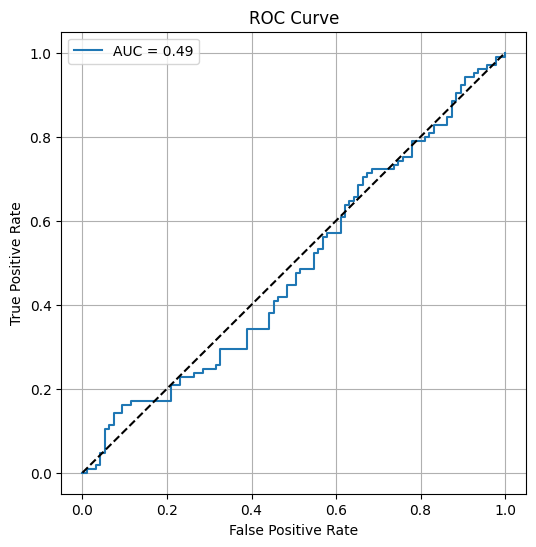

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
auc_score = roc_auc_score(y_test, test_preds)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
torch.save(model.state_dict(), 'logistic_regression_model.pth')

In [25]:
# Recreate the model architecture
input_dim = X_train.shape[1]
loaded_model = LogisticRegressionModel(input_dim)

# Load the saved parameters
loaded_model.load_state_dict(torch.load('logistic_regression_model.pth'))

# Set to evaluation mode
loaded_model.eval()

LogisticRegressionModel(
  (linear): Linear(in_features=8, out_features=1, bias=True)
)

In [26]:
with torch.no_grad():
    # Make predictions on test data
    test_preds = loaded_model(X_test_tensor)
    test_preds_class = (test_preds >= 0.5).float()

    # Calculate accuracy
    test_accuracy = (test_preds_class == y_test_tensor).float().mean()

    print(f"Test Accuracy (Loaded Model): {test_accuracy.item() * 100:.2f}%")

Test Accuracy (Loaded Model): 47.50%


In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define model class
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Prepare data
# X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
# X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
# y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Learning rates to test
learning_rates = [0.01, 0.05, 0.1]
num_epochs = 100
results = {}

# Loop through each learning rate
for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")

    # Reinitialize model and optimizer
    input_dim = X_train_tensor.shape[1]
    model = LogisticRegressionModel(input_dim)
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    # Train model
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

    # Evaluate model
    model.eval()
    with torch.no_grad():
        test_preds = model(X_test_tensor)
        test_preds_class = (test_preds >= 0.5).float()
        test_accuracy = (test_preds_class == y_test_tensor).float().mean().item()
        results[lr] = test_accuracy
        print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Report best learning rate
best_lr = max(results, key=results.get)
print(f"\n✅ Best Learning Rate: {best_lr} with Test Accuracy: {results[best_lr] * 100:.2f}%")


Training with learning rate: 0.01
Test Accuracy: 50.50%

Training with learning rate: 0.05
Test Accuracy: 49.50%

Training with learning rate: 0.1
Test Accuracy: 55.50%

✅ Best Learning Rate: 0.1 with Test Accuracy: 55.50%


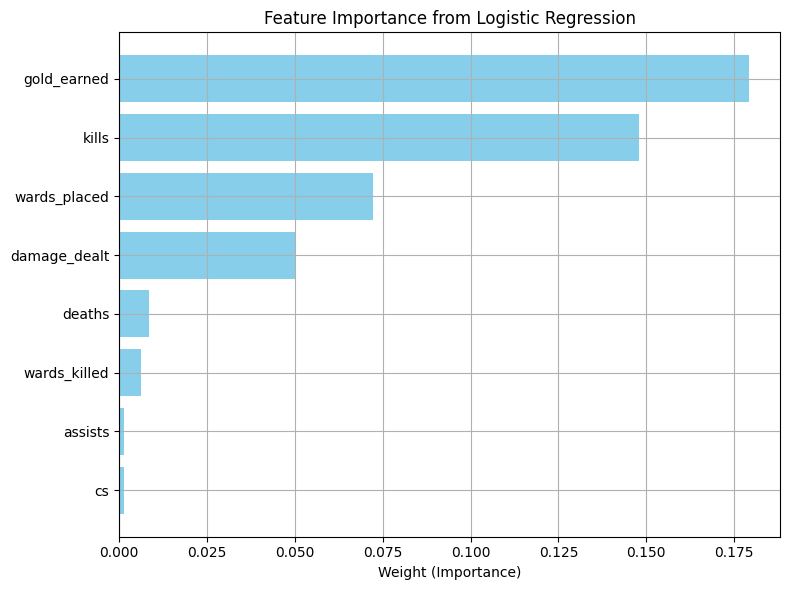

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Weight (Importance)')
plt.title('Feature Importance from Logistic Regression')
plt.gca().invert_yaxis()  # Most important feature at the top
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
# Get the weights from the trained model
weights = model.linear.weight.data.numpy().flatten()

# Get the feature names
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(weights) # Using absolute value for importance
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

display(feature_importance_df)

,Feature,Importance
3,gold_earned,0.179074
0,kills,0.147857
5,wards_placed,0.072233
7,damage_dealt,0.050463
1,deaths,0.008365
6,wards_killed,0.006127
2,assists,0.001491
4,cs,0.001357


# Yeni Bölüm

# Yeni Bölüm